**About Case Study**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

Defining Problem Statement

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

**Objective**



*   Create a descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
*   For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files


uploaded = files.upload()

Saving aerofit_treadmill.csv to aerofit_treadmill.csv


In [5]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Dataset Characterstics**

Dataset contains following columns


*   **Product Purchased**: KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers

*   **Age** : In years, age of the customer who purchased

*   **Gender**: Gender of the purchased customer
*   **Education**: represented in years


*   **Marital Status**: Single or partnered


*   **Usage**: The average number of times the customer has planned to use the treadmill each week

*   **Fitness**: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
*   **Miles**: The average number of miles the customer expects to walk or run each week


*   **Income**: Annual income of the user in Dollars $








In [19]:
df.shape

(180, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Descriptive analysis**

Total count of all columns is 180


Age: Mean age of the customer is 28 years, half of the customer's mean age is
26.

Education: Mean Education is 15 with maximum as 21 and minimum as 12.

Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.

Fitness: Average rating is 3.3 on a scale of 1 to 5.

Miles: Average number of miles the customer walks is 103 miles per week

Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

**Non-Graphical Analysis: Value counts and unique attributes**

**Numerical Summary**

In [22]:
# unique list of product ids
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [24]:
# total no. of unique product ids
df['Product'].nunique()

3

In [25]:
# total number of unique ages
df['Age'].nunique()

32

In [27]:
# Number of Male and Female customers
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [29]:
# list of unique educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [32]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

,count
Fitness,
1,2
2,26
3,97
4,24
5,31


In [34]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()

,count
Product,
KP281,80
KP481,60
KP781,40


In [35]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

,count
Fitness,
1,2
2,26
3,97
4,24
5,31


In [36]:
# Number of customers counts on Usage
df['Usage'].value_counts().sort_index()

,count
Usage,
2,33
3,69
4,52
5,17
6,7
7,2


In [39]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


**Summary**


*   KP281, KP481, KP781 are the 3 different products

*   There are 32 unique ages

*   Most commonly purchased treadmill product type is KP281

*  104 Males and 76 Females are in the customers list
*   8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)


*   Highest rated Fitness rating is 3


*   Most customers usage treadmill atleast 3 days per week


*   Majority of the customers who have purchased are Married/Partnered



In [52]:

# Converting Int data type of fitness rating to object data type
df['Fitness_Category'] = df['Fitness']


In [55]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Fitness_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,4
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,3
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,2


In [56]:
df['Fitness_Category'].replace({1:'Poor shape', 2:"Bad shape", 3:"Average Shape", 4:"Good Shape", 5:"Excellent Shape"}, inplace=True)

In [57]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,Fitness_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Bad shape


Categoriaztion of Fitness rating(int) to Descriptive categories(str)

1. Poor Shape
2. Bad Shape
3. Average Shape
4. Good Shape
5. Excellent Shape

**Statistical Summary**

In [10]:
# for unique list of products, listed in percentage
prod = df['Product'].value_counts(normalize=True)
cal = prod.map(lambda x: round(x*100,2))

In [11]:
cal

,proportion
Product,
KP281,44.44
KP481,33.33
KP781,22.22




*   44.44% of customers bought KP281 product type
*   33.33% of customers bought KP481 product type

*   22.22% of customers bought KP781 product type





In [12]:
# Customer Gender statistics (listed in %)
gen = df['Gender'].value_counts(normalize=True)
genp = gen.map(lambda x: round(x*100,2))

In [13]:
genp

,proportion
Gender,
Male,57.78
Female,42.22


**57.78%** of customers are **Male** and **42.22%** customers are **Female**

In [14]:
# Customers Marital Status (listed in %)
mar = df['MaritalStatus'].value_counts(normalize=True)
marp = mar.map(lambda x : round(x*100,2))

In [15]:
marp

,proportion
MaritalStatus,
Partnered,59.44
Single,40.56


In [16]:
# Usage: Number of days used per week (listed in %)
wee = df['Usage'].value_counts(normalize=True)
usg = wee.map(lambda x: round(x*100,2)).reset_index()


In [17]:
usg.rename(columns = {'Usage':'days_per_week'},inplace=True)

In [18]:
usg

,days_per_week,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


Around **39%** of customers use **3** days per week

Less than **2%** of customers use **7** days per week

In [19]:
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'Fitness':'Rating'},inplace=True)
rating


,Rating,proportion
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


More than 53% of customers have rated themselves as average in fitness (rated 3)

14% of customers have rated their fitness less than average

Over 17% of customers have peak fitness ratings

**Visual Analysis - Univariate & Bivariate**


**Univariate Analysis**

---



<Axes: xlabel='Product', ylabel='count'>

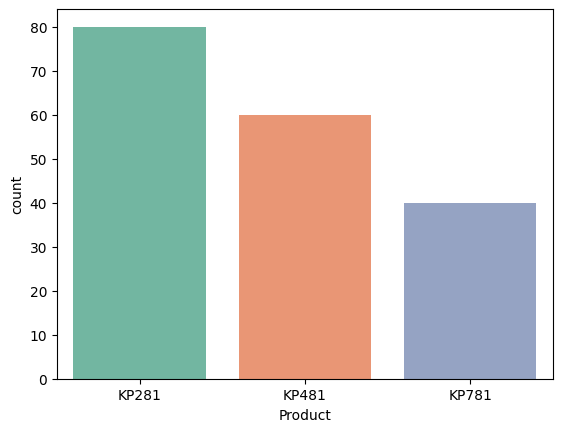

In [26]:
# Count plot - Product Analysis
sns.countplot(data=df, x='Product',palette = 'Set2')


**KP281** is the most commonly purchase product type

**KP481** is the second most top product type purchased

**KP781** is the least purchased product type

<Axes: xlabel='MaritalStatus', ylabel='count'>

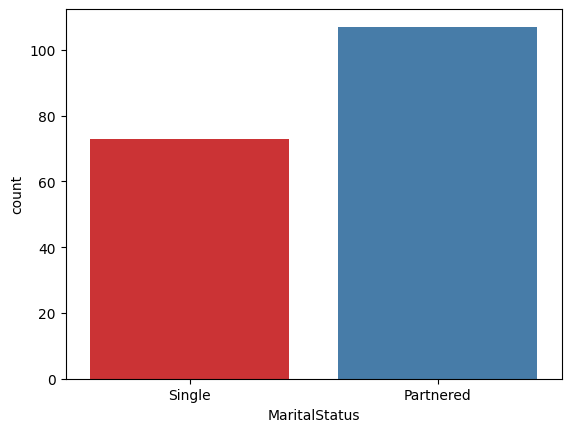

In [28]:
# Marital Status Analysis
sns.countplot(data=df,x='MaritalStatus',palette = 'Set1')

<Axes: xlabel='Gender', ylabel='count'>

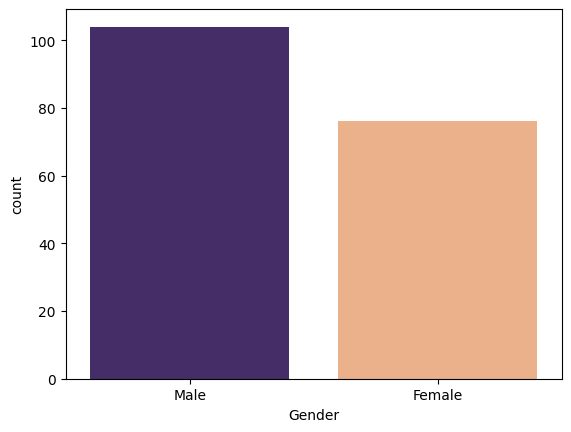

In [29]:
#Gender Analysis - Count plot
sns.countplot(data=df,x='Gender',palette=['#432371',"#FAAE7B"])

Most Products are purchased by Male.

Females are less interested than Males.

<Axes: xlabel='Fitness', ylabel='count'>

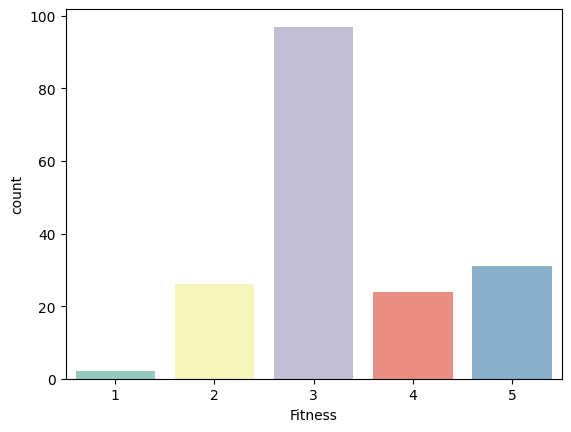

In [32]:
#Fitness Rating Anlaysis - CountPlot
sns.countplot(data=df,x='Fitness',palette='Set3')

More than **90** customers have rated their physical fitness rating as **Average**

**Excellent shape** is the second highest rating provided by the customers

<Axes: xlabel='Income', ylabel='Density'>

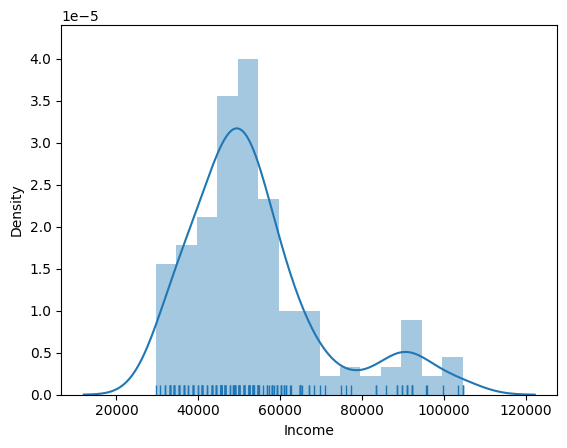

In [33]:
# Income Analysis - Distplot
sns.distplot(df['Income'], rug = True)

Most of customers who have purchased the product have a average income between **40K to 60K**

Average Income density is over** 3.0**

<Axes: xlabel='Income', ylabel='Count'>

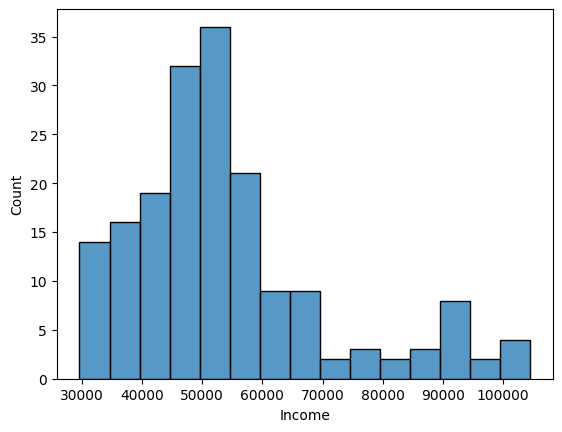

In [34]:
#Income Analysis - Histogram
sns.histplot(data=df,x='Income')

More than 35 customers earn 50-55K per year

More than 30 customers earn 45-50K per year

More than 20 customers earn 55-60K per year

<Axes: xlabel='Education', ylabel='Count'>

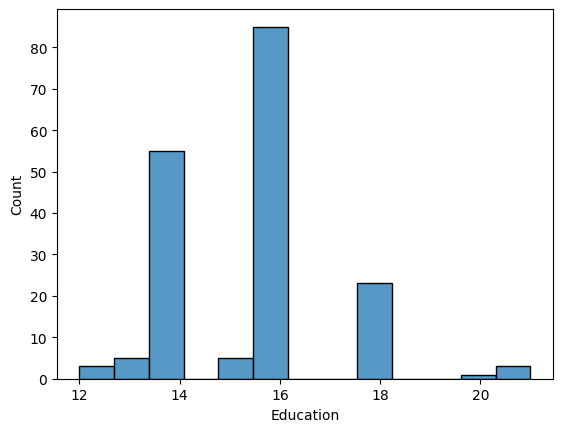

In [35]:
# Education Analysis - Histogram
sns.histplot(data=df,x='Education')

Highest **number of customers have 16** as their Education

**14 is the second highest** education among the customers

**20 is the least** education among the customers

<Axes: xlabel='Usage', ylabel='Count'>

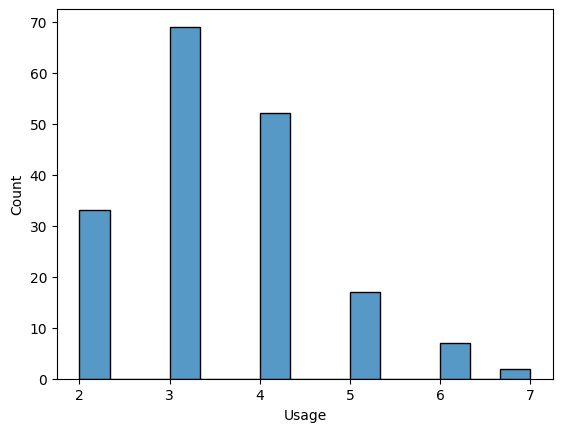

In [36]:
# Usage Analysis - Histogram
sns.histplot(data=df,x='Usage')

3 days per week is the most common usage among the customers

4 days and 2 days per week is the second and third highest usage among the customers

Very few customers use product 7 days per week

<Axes: xlabel='Fitness', ylabel='Count'>

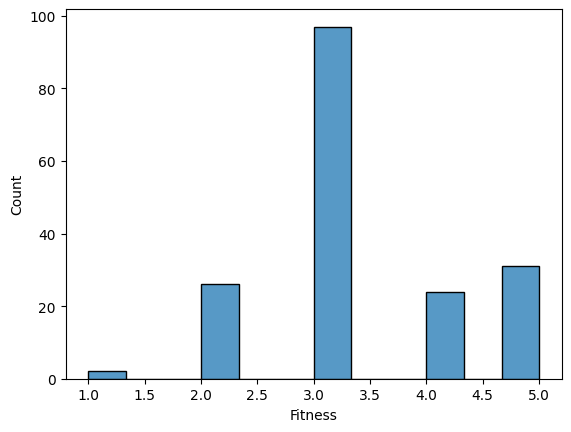

In [37]:
# Fitness Analysis - Histogram
sns.histplot(data=df,x='Fitness')

Average shape is the most rating customers have given for fitness rating

Around 40 customers have stated Excelled Shape as fitness rating

**For Categorical Variables : Box Plot**




<Axes: xlabel='Usage'>

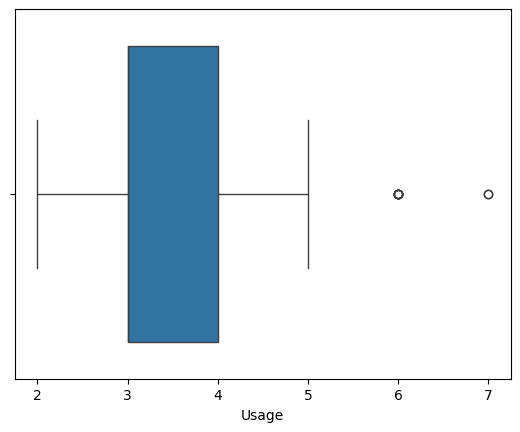

In [38]:
# Usage Analysis - checking Outliers
sns.boxplot(data=df,x='Usage')

3 to 4 days is the most preferred usage days for customers

6 and 7 days per week is roughly the usage days for few customers **(Outliers)**

<Axes: xlabel='Age'>

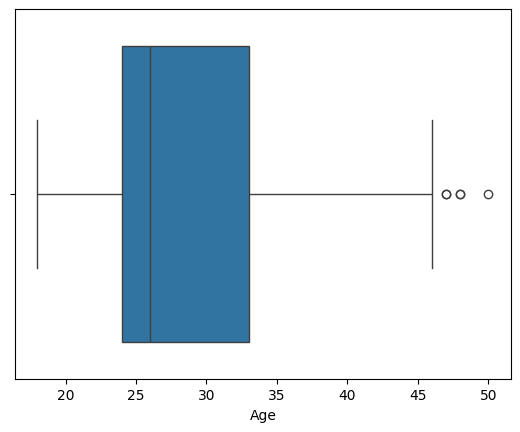

In [40]:
# Age Analysis - Box plot
sns.boxplot(data=df,x='Age')


23 to 34 is the most common customer age group that has purchased the product

Above 45 years old customers are very few compared to the young age. Above 45 age are the Outliers.

<Axes: xlabel='Income'>

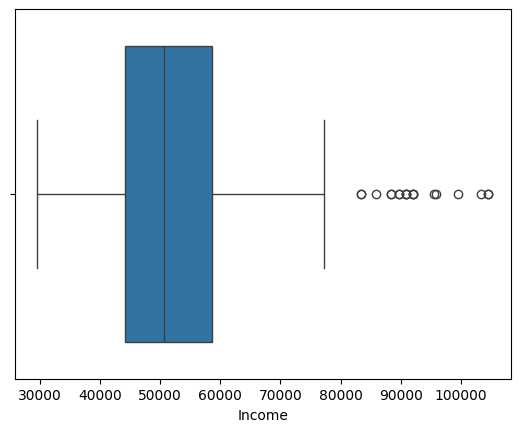

In [41]:
#Income Analysis
sns.boxplot(data=df,x='Income')

Few customers have income above 80K per annum **(Outliers)**

Most customers earn from **45K to around 60K per annum**

**For correlation: Heatmaps, Pairplots**

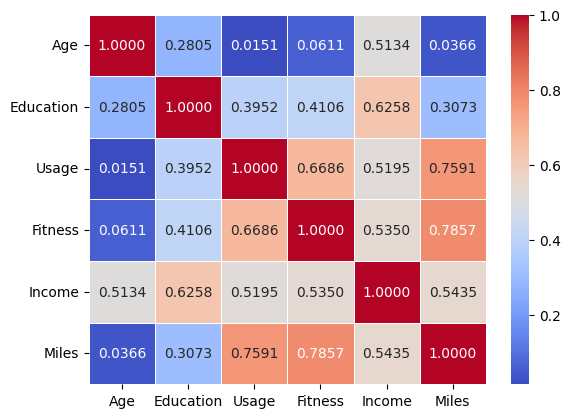

In [52]:
#Correlation HeatMap
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

Correlation between Age and Miles is 0.03

Correlation between Education and Income is 0.62

Correlation between Usage and Fitness is 0.66

Correlation between Fitness and Age is 0.06

Correlation between Income and Usage is 0.51

Correlation between Miles and Age is 0.03

<Figure size 1200x300 with 0 Axes>

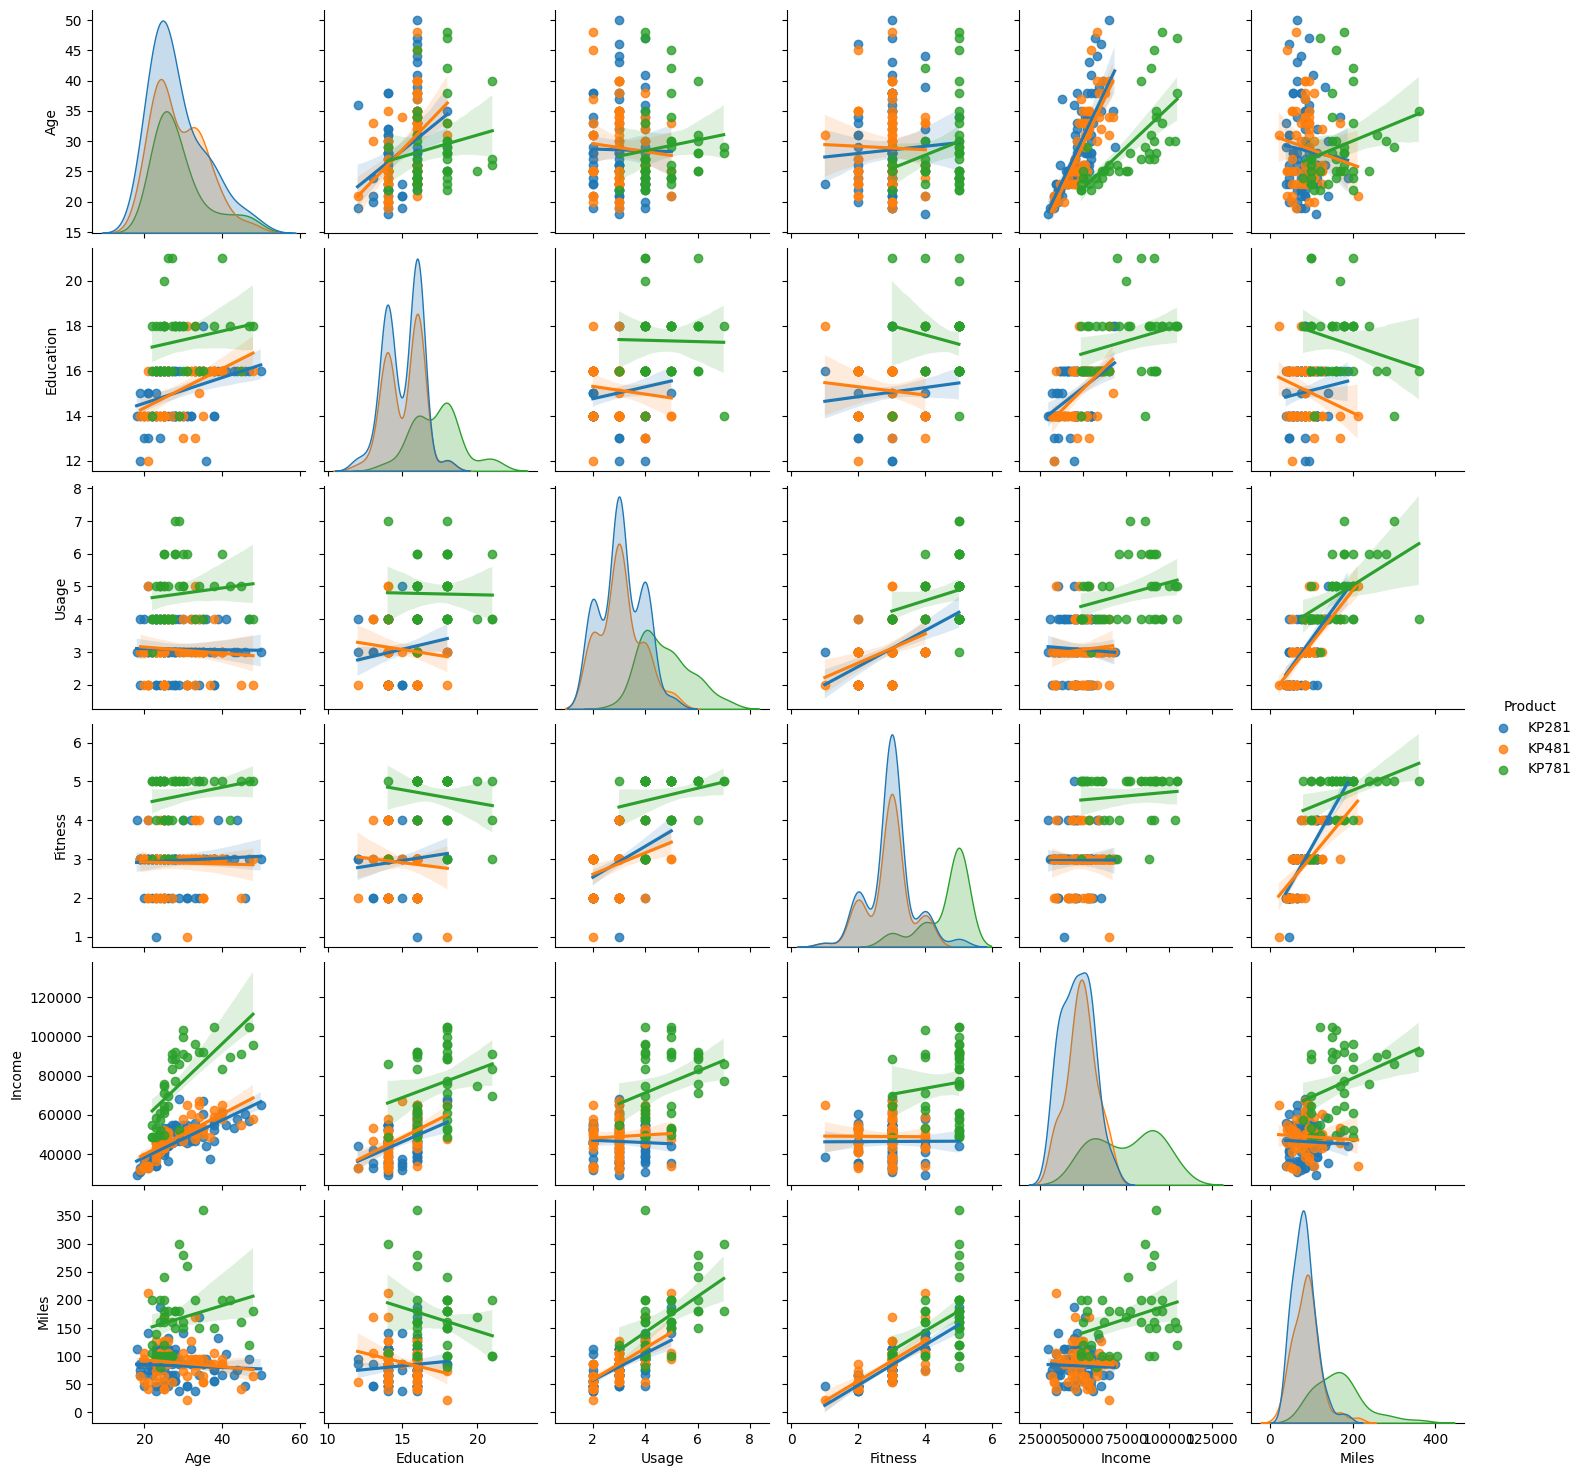

In [59]:
# Product Analysis - Pair Plot
plt.figure(figsize=(12,3))
sns.pairplot(df,hue='Product',kind='reg')

<Figure size 1200x300 with 0 Axes>

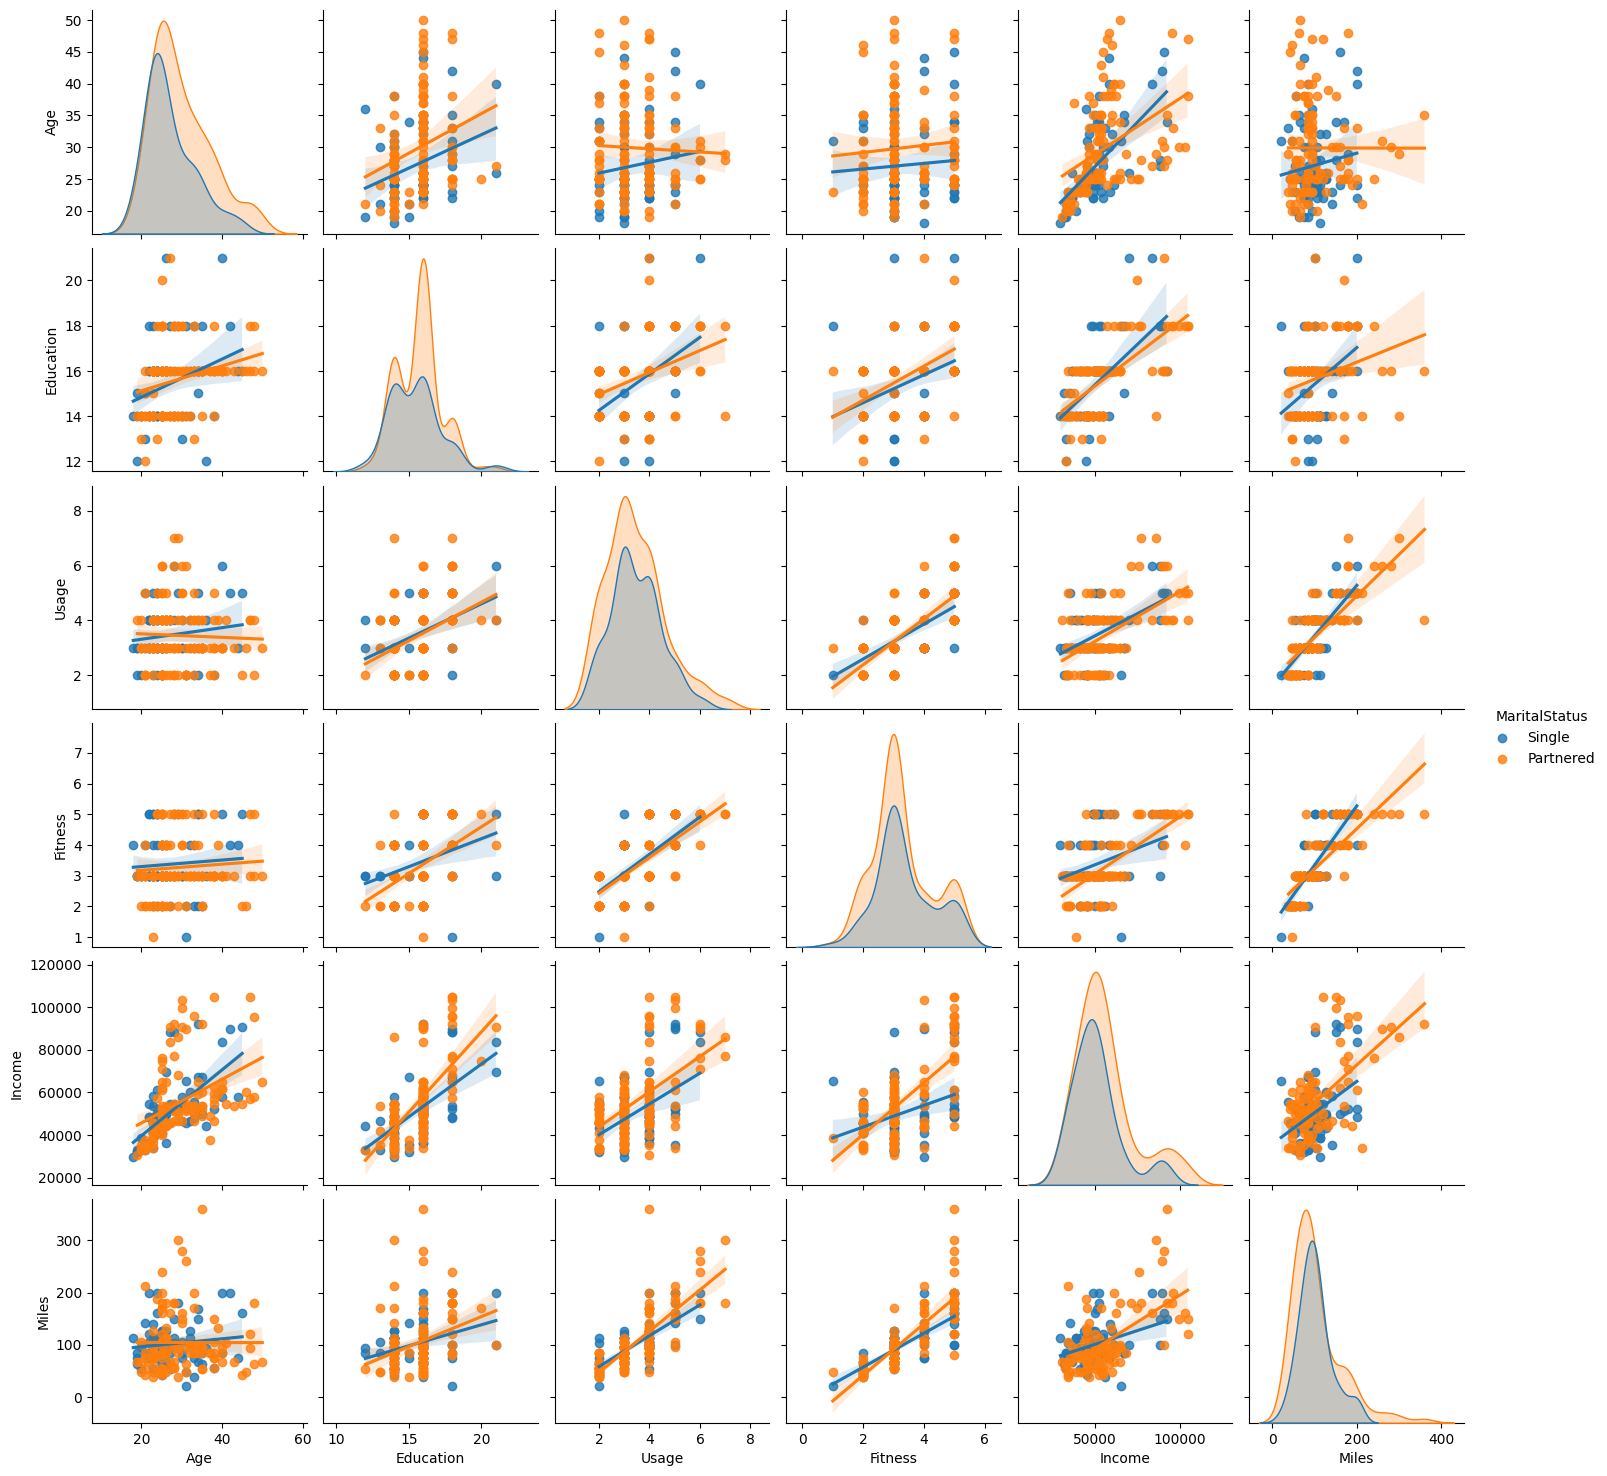

In [61]:
# Marital Status - pair plot
plt.figure(figsize=(12,3))
sns.pairplot(df,hue='MaritalStatus',kind='reg')

**Bivariate Analysis**

---



In [6]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

,Usage
Product,
KP281,3.087500
KP481,3.066667
KP781,4.775000


Mean usage for product KP281 is 3.08

Mean usage for product KP481 is 3.06

Mean usage for product KP781 is 4.77

In [7]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

,Age
Product,
KP281,28.55
KP481,28.90
KP781,29.10


Mean Age of the customer who purchased product KP281 is 28.55

Mean Age of the customer who purchased product KP481 is 28.90

Mean Age of the customer who purchased product KP781 is 29.10

In [8]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

,Education
Product,
KP281,15.037500
KP481,15.116667
KP781,17.325000


Education qualification of the customer who purchased product KP281 is 15.03

 Education qualification of the customer who purchased product KP481 is 15.11

Education qualification of the customer who purchased product KP781 is 17.32

In [9]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

,Fitness
Product,
KP281,2.9625
KP481,2.9000
KP781,4.6250


Customer fitness mean for product KP281 is 2.96

Customer fitness mean for product KP481 is 2.90

Customer fitness mean for product KP781 is 4.62

<Axes: xlabel='Product', ylabel='count'>

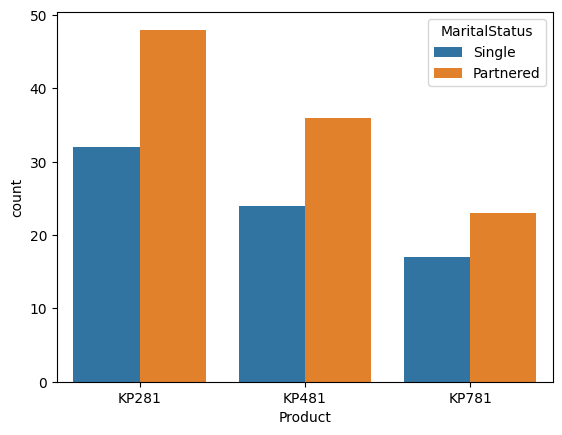

In [10]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=df,x='Product',hue='MaritalStatus')

<Axes: xlabel='Product', ylabel='count'>

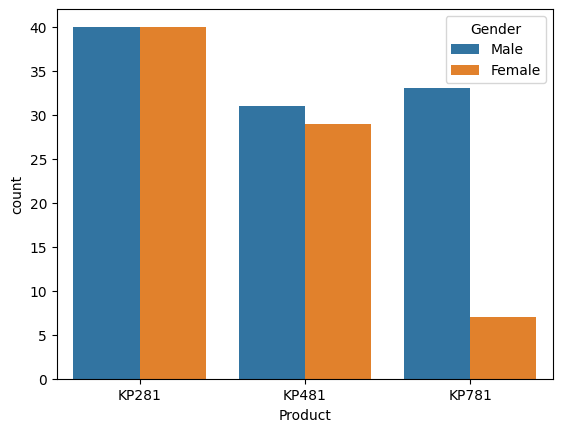

In [11]:
# Product purchased among Male and Female
sns.countplot(data=df,x='Product',hue='Gender')

<Axes: xlabel='MaritalStatus', ylabel='count'>

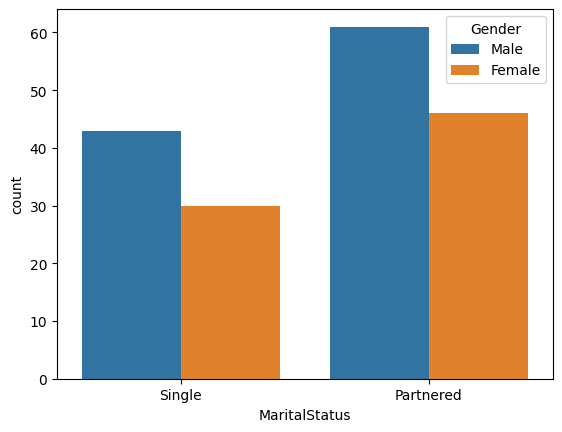

In [12]:
# Count among Gender and their Marital Status
sns.countplot(data=df,x='MaritalStatus',hue='Gender')

Partnered customers are the most buyers of aerofit product

Out of both Single and Partnered customers, Male customers are significantly high

Female customers are considerably low compared to Male customers

<Axes: xlabel='Usage', ylabel='count'>

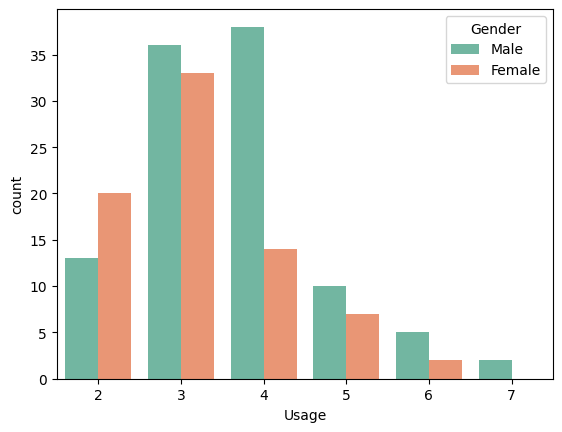

In [14]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender',palette='Set2')

Among Male and Female genders, Male's usage is 4 days per week

Female customers mostly use 3 days per week

<Axes: xlabel='Fitness', ylabel='count'>

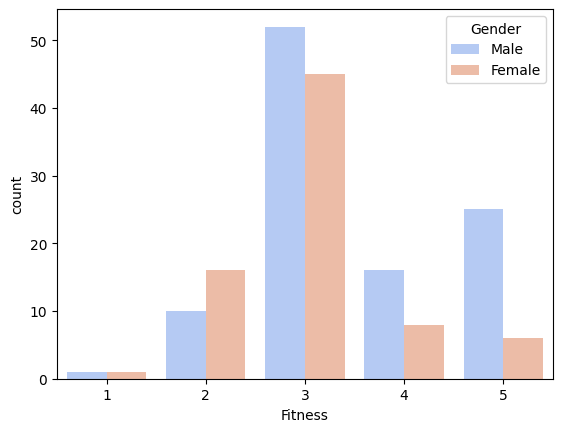

In [15]:
# Fitness rating among the customers categorised by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Fitness',hue='Gender',palette='coolwarm')

Among the fitness rating both Male and Female most have rated as average

<Axes: xlabel='Income', ylabel='Density'>

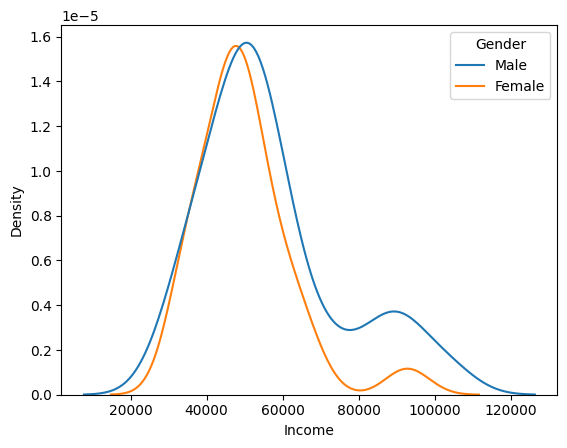

In [16]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Income',hue='Gender')

From the above diagram, we can conclude the spike from 40K to around 70K is the most common income per annum of the customers

<Axes: xlabel='Fitness', ylabel='Density'>

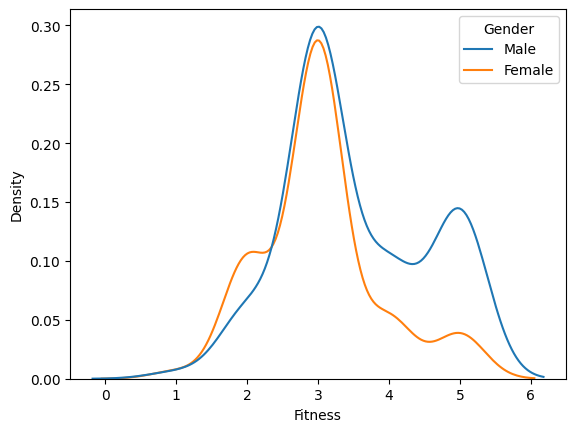

In [18]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Fitness',hue='Gender')

Male customers are in better shape the female customers

Though Female customers do not have poor shape, they are also not in excellent shape

Some Male customers excellent body shape and few customers have poor shape as well

<Axes: xlabel='Miles', ylabel='Density'>

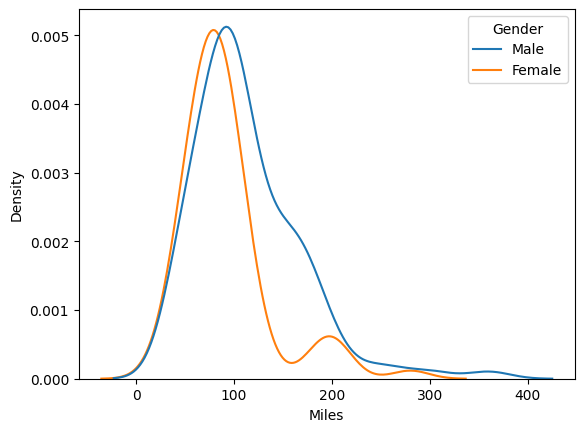

In [19]:
# Distance covered by each Gender among the customers
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Miles',hue='Gender')

Male customers have a consistent distance coverage than female customers

Female customers have max distance covered as just over 300 miles

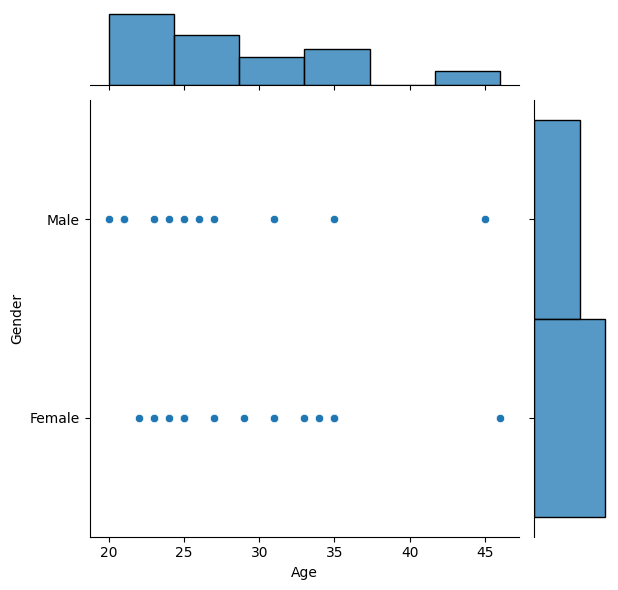

In [20]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=df[df.Fitness<3])

Above Joint plot describes the relationship between the customer age and their gender grouping.

Product is not familiar with older or middle age womens

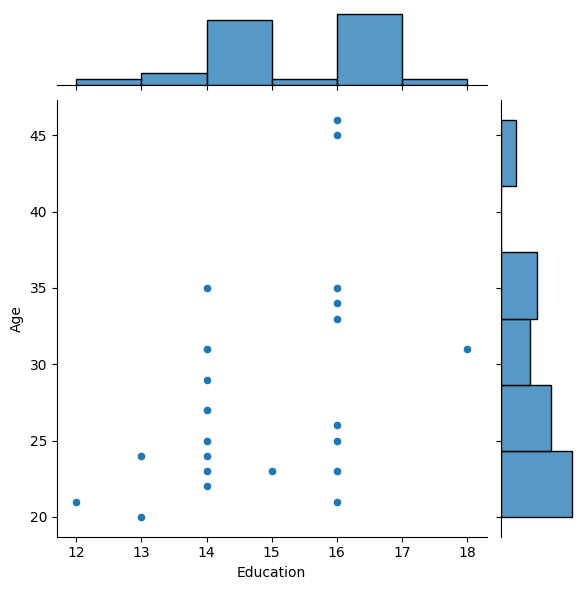

In [24]:
#Scatterplot for customers Education and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Education',y='Age',data=df[df.Fitness<3])

Majority of the age and education density falls on 25-30 age group and 13-14 education

<Axes: xlabel='Miles', ylabel='Income'>

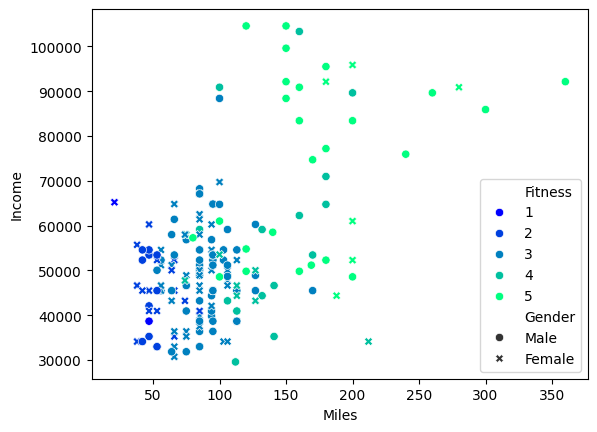

In [25]:
# Scatter Plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender',palette='winter')

Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.

Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.

<Axes: xlabel='Age', ylabel='Product'>

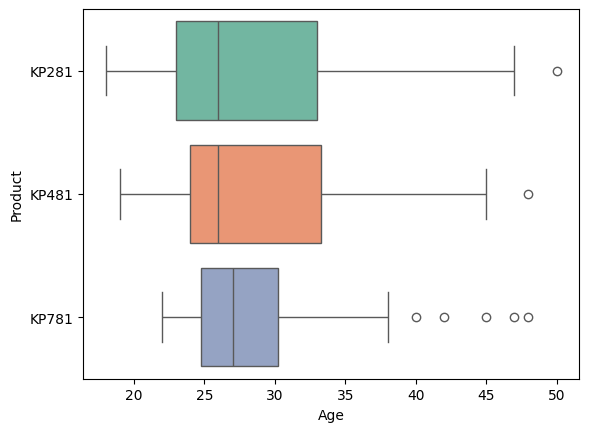

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=df,palette='Set2')

Roughly few customers with age above 40 use product KP781

Most of the customers are comfortable with KP281 product type

KP481 is the second highest popular product among the younger side of the customer

<Axes: xlabel='Miles', ylabel='Product'>

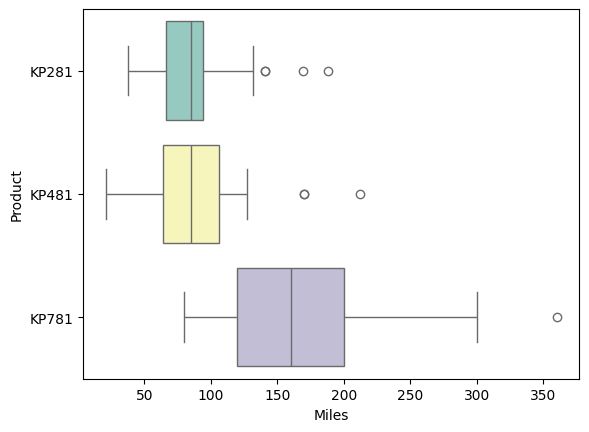

In [28]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Miles',y='Product',data=df,palette='Set3')

Customers with product KP781, has been able to cover more miles than other two product types

KP481 product is the second most highest miles covering product among the customers

<Axes: xlabel='Fitness', ylabel='Product'>

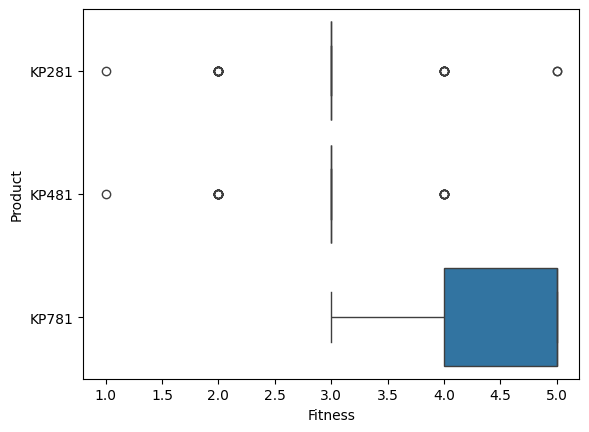

In [29]:
# Fitness of customer with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Fitness',y='Product',data=df)

Customers with excellent shape are significantly using **KP781** product type

KP481 and KP281 product type are scattered across the fitness rating

<Axes: xlabel='Income', ylabel='Proportion'>

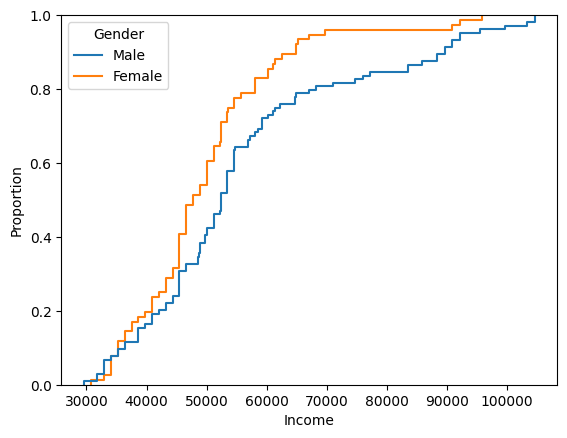

In [30]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Gender
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='Gender',complementary=False)

Customers with minimum of 30K as annual income are the ones that are able to afford aerofit products

Male customers with Higher salaries are the most common purchasers of the product

<Axes: xlabel='Income', ylabel='Proportion'>

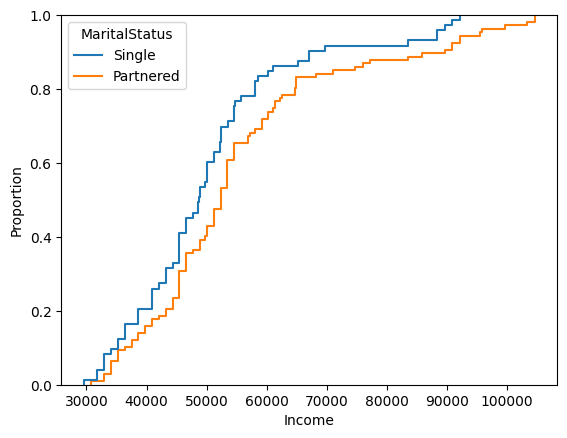

In [32]:
# Empirical Cumulative Distribution Function - proportional distribution for Income of customers against their Marital Status
plt.figure(figsize=(15,5))
sns.ecdfplot(data=df,x='Income',hue='MaritalStatus',complementary=False)

Single customer have higher proportion than partnered customers

Partnered customers are more than single customers and they also earn more than single customers

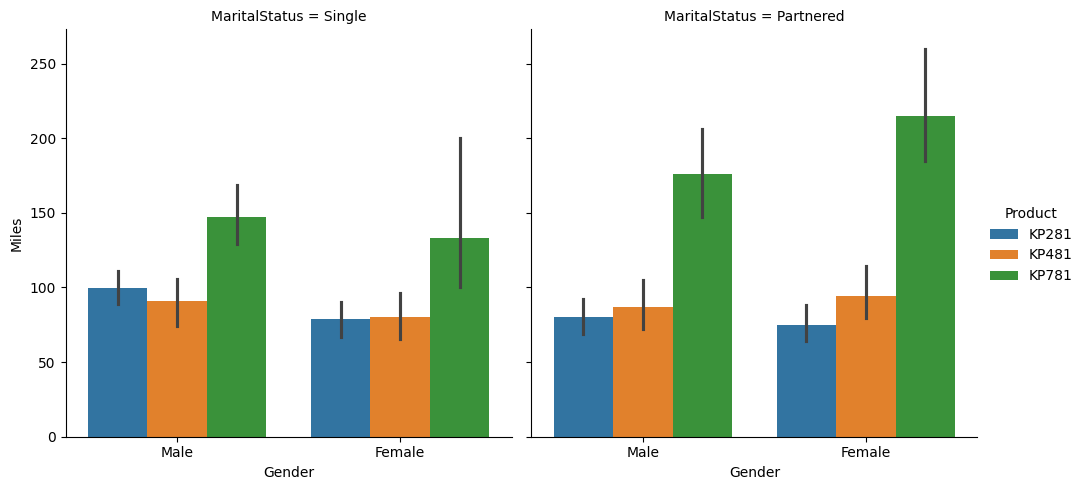

In [33]:
# Miles covered in each product by gender and their marital status

sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df,kind='bar')

KP781 is more populat among the single and Partnered customers

Among the both marital statuses, Single female does not prefer much of the products.

Partnered Female bought KP781 treadmill compared to Partnered Male.

Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.

Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.

There are more single Males buying treadmill than single Females.

**Missing Value & Outlier Detection**

In [34]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


No duplicates have been observed

In [36]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


**Business Insights based on Non-Graphical and Visual Analysis**

Customer Group Age Analysis

In [41]:
df['age_group'] = df.Age
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,18
1,KP281,19,Male,15,Single,2,3,31836,75,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,19
3,KP281,19,Male,12,Single,3,3,32973,85,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,20


In [42]:
df.age_group = pd.cut(df.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [43]:
df.head()
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen


In [45]:
df['age_group'].value_counts()

,count
age_group,
Adult,135
Middle Aged,22
Teen,17
Elder,6


In [46]:
df.loc[df.Product=='KP281']["age_group"].value_counts()

,count
age_group,
Adult,56
Middle Aged,11
Teen,10
Elder,3


In [47]:
df.loc[df.Product=='KP481']["age_group"].value_counts()

,count
age_group,
Adult,45
Teen,7
Middle Aged,7
Elder,1


In [48]:
df.loc[df.Product=='KP781']["age_group"].value_counts()

,count
age_group,
Adult,34
Middle Aged,4
Elder,2
Teen,0


In [49]:
pd.crosstab(index=df.Product,columns=df.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


**Conditional and Marginal Probabilities**



Marginal Probabilities

Text(0.5, 1.0, 'Count of Male and Female uses Particular Products')

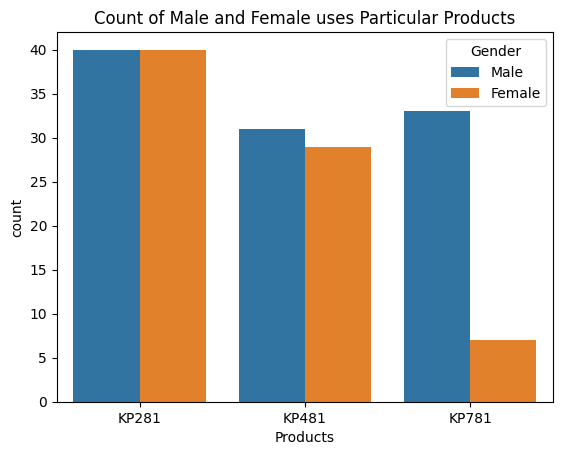

In [62]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")

In [63]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [64]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

Probability of Male Customer Purchasing any product is : 57.77 %

Probability of Female Customer Purchasing any product is : 42.22 %



**Marginal Probability of any customer buying**


product KP281 is : 44.44 % (cheapest / entry level product)

product KP481 is : 33.33 % (intermediate user level product)

product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

**Conditional Probability**

In [65]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

**Customer Profiling for Each Product**
Customer profiling

Based on the 3 product categories provided:

**KP281**

Easily affordable entry level product, which is also the maximum selling product.

KP281 is the most popular product among the entry level customers.

This product is easily afforded by both Male and Female customers.

Average distance covered in this model is around 70 to 90 miles.

Product is used 3 to 4 times a week.

Most of the customer who have purchased the product have rated Average shape as the fitness rating.

Younger to Elder beginner level customers prefer this product.

Single female & Partnered male customers bought this product more than single male customers.

Income range between 39K to 53K have preferred this product.

KP481

This is an Intermediate level Product.

KP481 is the second most popular product among the customers.

Fitness Level of this product users varies from Bad to Average Shape depending on their usage.

Customers Prefer this product mostly to cover more miles than fitness.

Average distance covered in this product is from 70 to 130 miles per week.

More Female customers prefer this product than males.

Probability of Female customer buying KP481 is significantly higher than male.

KP481 product is specifically recommended for Female customers who are intermediate user.

Three different age groups prefer this product - Teen, Adult and middle aged.

Average Income of the customer who buys KP481 is 49K.

Average Usage of this product is 3 days per week.

More Partnered customers prefer this product.

There are slightly more male buyers of the KP481.

KP781

Due to the High Price & being the advanced type, customer prefers less of this product.

Customers use this product mainly to cover more distance.

Customers who use this product have rated excelled shape as fitness rating.

Customer walk/run average 120 to 200 or more miles per week on his product.

Customers use 4 to 5 times a week at least.

Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

Middle aged to higher age customers tend to use this model to cover more distance.

Average Income of KP781 buyers are over 75K per annum

**Recommendation**


Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

KP781 product should be promotted using influencers and other international atheletes.

Research required for expanding market beyond 50 years of age considering health pros and cons.

Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.